### $\color{royalblue}{\text{ Прва вјежба из нумеричких метода у астрономији, датум: 04.12.2025.}} $

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
import time

#### $\color{magenta}{\text{РЈЕШАВАЊЕ КЕПЛЕРОВЕ ЈЕДНАЧИНЕ.}} $

Рјешавање Кеплерове једначине ($M=E-e\sin E$) на 3 начина:

1) скаларне вриједности $M,e$;

2) 2D низови $M,e$ тако да се све вријеме итерира цијели низ док сви случајеви не конвергирају;

3) 2D низови $M,e$ тако да се итерирају само они дијелови низа који још увијек нису конвергирали.

Друга и трећа верзија су векторизоване. Користиће нам записи:

$$
f(E)=E-e\sin E -M,\quad f'(E)=1-e\cos E,
$$

$$
E_{n+1} = E_n - \frac{f(E_n)}{f'(E_n)},
$$

$$
E_{n+1} = E_n - \frac{E_n - e\sin E_n - M}{1 - e\cos E_n}.
$$

In [2]:
def kepler(M, e, tol): # скаларна верзија 

    delta = 2 * tol # почетна вриједност већа од тачности да бисмо ушли у петљу
    E = M # почетна апроксимација

    while np.abs(delta)>tol:
        f = E - e * np.sin(E) - M # функција
        fprim = 1 - e * np.cos(E) # извод функције
        delta = f/fprim # "корак итерације"
        E = E - delta # нова вриједност Е
    return E


def kepler_array_1(M, e, tol): # верзија за низове, итерира се цијели низ сваки пут

    delta = 2 * tol # почетна вриједност већа од тачности да бисмо ушли у петљу
    E = np.copy(M) # почетна апроксимација

    while np.any(np.abs(delta) > tol): # провјера да ли је неки елемент низа већи од тачности
        f = E - e * np.sin(E) - M # функција
        fprim = 1 - e * np.cos(E) # извод функције
        delta = f / fprim # "корак итерације"
        E = E - delta # нова вриједност Е
    return E


def kepler_array_2(M, e, tol): # верзија за низове, итерира се само дио низа који није конвергирао

    E = np.copy(M) # почетна апроксимација
    mask = np.ones_like(E, dtype=bool) # маска за елементе који још увијек нису конвергирали

    f = np.zeros_like(E) # функција
    fprim = np.zeros_like(E) # извод функције
    delta = np.zeros_like(E) # "корак итерације"

    while np.any(mask): # провјера да ли је неки елемент низа већи од тачности
        f[mask] = E[mask] - e[mask] * np.sin(E[mask]) - M[mask] # функција
        fprim[mask] = 1 - e[mask] * np.cos(E[mask]) # извод функције
        delta[mask] = f[mask] / fprim[mask] # "корак итерације"
        E[mask] = E[mask] - delta[mask] # нова вриједност Е
        mask = np.abs(delta) > tol # ажурирање маске
    return E

In [14]:
tacnost=1e-5 # тражена тачност

br_m = 200 # број тачака средње аномалије
br_e = 200 # број тачака ексцентричности

e = np.linspace(0, 1, br_e, endpoint=False) # ексцентричност
m = np.linspace(0, 2*np.pi, br_m) # средња аномалија за коју одређујемо ексцентричну и праву аномалију

print(e.shape, m.shape)

ecca_for = np.zeros([br_e, br_m]) # за резултате из for петље
print(ecca_for.shape)

m2d, e2d = np.meshgrid(m, e) # припрема 2D низова
# print(m2d, e2d)


(200,) (200,)
(200, 200)


In [5]:

pocetak = time.time() 

for i, e1 in enumerate(e): 
    for j, m1 in enumerate(m): 
        ecca_for[i][j] = kepler(m1, e1, tol = tacnost) # позив скаларне функције
trajanje_for = time.time() - pocetak 
    

pocetak = time.time()
m1, e1 = np.meshgrid(m, e) # припрема 2D низова
ecca_array_1 = kepler_array_1(m1, e1, tol = tacnost) # позив функције за 2D низове
trajanje_array_1 = time.time() - pocetak 


pocetak = time.time() # 
m2, e2 = np.meshgrid(m, e) # припрема 2D низова
ecca_array_2 = kepler_array_2(m2, e2, tol = tacnost) # позив функције за 2D низове
trajanje_array_2 = time.time() - pocetak 

print('Вријеме израчунавања за скаларну верзију (for петља):', np.round(trajanje_for, 4), 's')
print('Вријеме израчунавања за прву верзију са низовима:', np.round(trajanje_array_1, 4), 's')
print('Вријеме израчунавања за другу верзију са низовима:', np.round(trajanje_array_2, 4), 's')

Вријеме израчунавања за скаларну верзију (for петља): 2.3596 s
Вријеме израчунавања за прву верзију са низовима: 2.1428 s
Вријеме израчунавања за другу верзију са низовима: 0.2558 s


#### $\color{magenta}{\text{ГРАФИЧКА МЕТОДА - тражење нуле функције.}} $

Најједноставнија метода за налажење нуле функције. Рјешење се тражи "одокативно". 

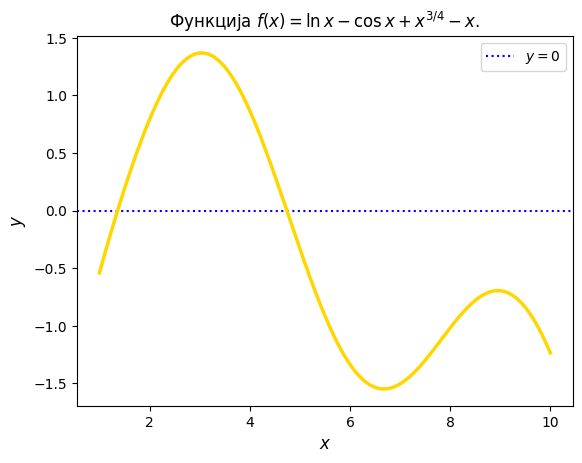

In [11]:
x = np.linspace(1, 10, 1000)
f = np.log(x) - np.cos(x) + x**(3/4) - x

plt.axhline(y=0, color='blue', linestyle=':', label='$y=0$') # хоризонтална линија

plt.plot(x, f, color='gold', linewidth=2.5)
plt.title(r'Функција $f(x)=\ln{x}-\cos{x}+x^{3/4}-x$.')
plt.xlabel(r'$x$', fontsize=12, fontweight='bold')
plt.ylabel(r'$y$', fontsize=12, fontweight='bold')
plt.legend()
plt.show()

#### $\color{magenta}{\text{МЕТОДА ТЕТИВА.}} $

Фигурише једначина $P(x)=0$. Тражимо вриједности ($a, b$) за које ће бити задовољен услов $P(a)\cdot P(b)<0$. Јединственост рјешења је гарантована ако је функција

монотона на интервалу $[a,\,b]$, тј. ако је $P'(x)>0$ или $P'(x)<0$. Другим ријечима, тражимо интервал на ком је функција непрекидна, монотона и треба да важи

$f(a)\cdot f(b)<0$. Пожељно је да интервал $(a,b)$ буде што је могуће мањи.

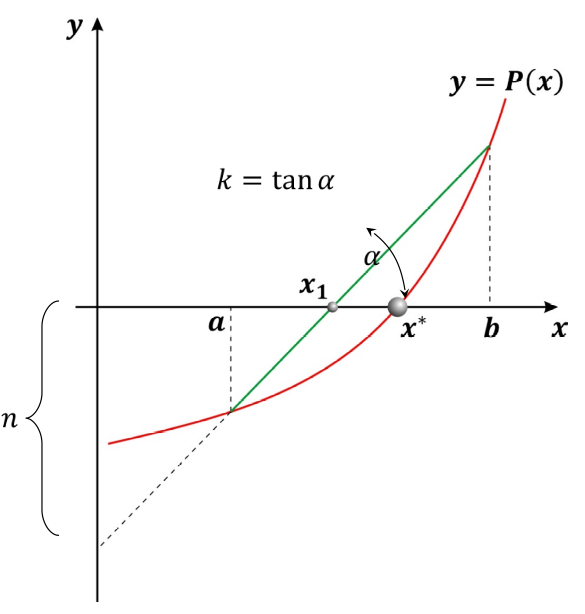

На слици изнад једначина праве има облик $y = kx + n$, и важе једнакости $P(a) = P_a = ka + n$ и $P(b) = P_b = kb + n$.

Комбинацијом, добија се једначина:

$$
x_1 = a - \frac{P_a(b-a)}{P_b - P_a}.
$$

Након израчунавања $x_1$, одређујемо нови интервал тако што провјеравамо знак производа:

* ако је $P(a)P(x_1) < 0$, коријен се налази у интервалу $[a, x_1]$;
* ако је $P(a)P(x_1) > 0$, коријен се налази у интервалу $[x_1, b]$.

На тај начин се вриједности $a$ и $b$ ажурирају у свакој итерацији тако да увијек важи $P(a)P(b) < 0$, односно интервал $[a,b]$ увијек садржи коријен једначине.



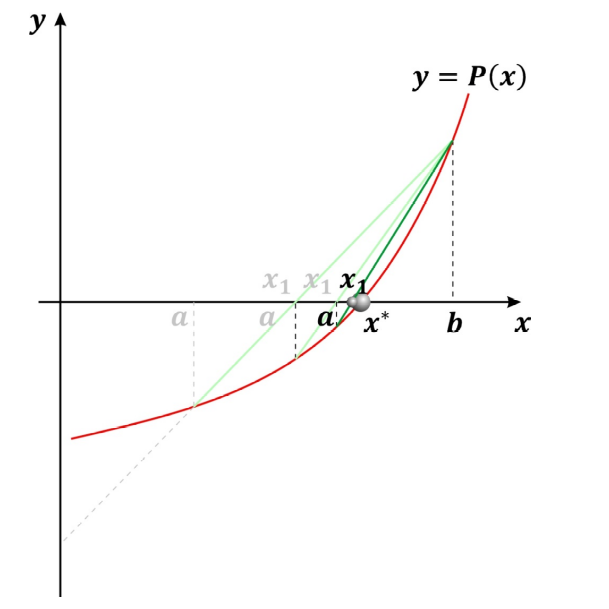

Посматрамо функцију $f(x)=\ln{x}-\cos{x}+x^{3/4}-x$, за коју желимо наћи нуле функције помоћу методе тетива. 

Дефинишемо почетне вриједности и параметре за петљу. Тачност одређује услов када се итерација зауставља, тј. када

је апсолутна разлика $\delta$ мања од предефинисане тачности.

Вријеме израчунавања: 0.01823 s
Број итерација: 5
Рјешење једначине: 4.740672


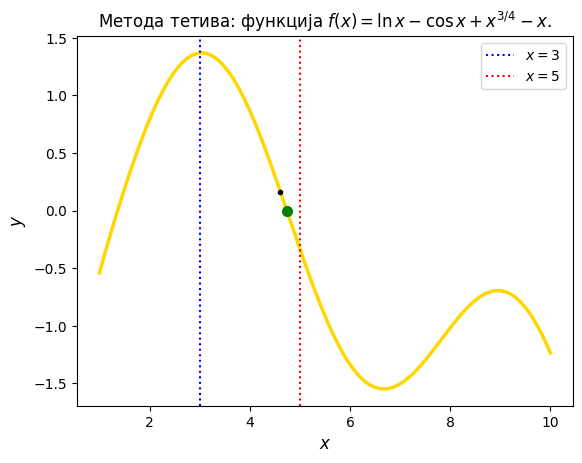

In [15]:
def f(x):
    return np.log(x) - np.cos(x) + x**(3/4) - x

x = np.linspace(1, 10, 1000)
fx = f(x)

plt.plot(x, fx, color='gold', linewidth=2.5)
plt.title(r'Метода тетива: функција $f(x)=\ln{x}-\cos{x}+x^{3/4}-x$.')
plt.xlabel(r'$x$', fontsize=12, fontweight='bold')
plt.ylabel(r'$y$', fontsize=12, fontweight='bold')

plt.axvline(x=3, color='blue', linestyle=':', label='$x=3$')  # вертикална линија
plt.axvline(x=5, color='red', linestyle=':', label='$x=5$')

a = 3
b = 5
tacnost = 1e-8

Pa = f(a)
Pb = f(b)

delta = b - a
broj_iteracija = 0
pocetak = time.time()

while abs(delta) > tacnost:
    broj_iteracija += 1

    Pa = f(a)
    Pb = f(b)

    x1 = a - Pa * (b - a) / (Pb - Pa)
    Px1 = f(x1)

    if Pa * Px1 < 0:
        b = x1
    else:
        a = x1

    delta = b - a

    plt.plot(x1, Px1, 'o', color='black', markersize=3)

vrijeme_tetive = time.time() - pocetak
iteracije_tetive = broj_iteracija

print('Вријеме израчунавања:', np.round(vrijeme_tetive, 5), 's')
print('Број итерација:', iteracije_tetive)
print('Рјешење једначине:', np.round(x1, 6))

plt.plot(x1, Px1, 'o', color='green', markersize=7)
plt.legend()
plt.show()

#### $\color{magenta}{\text{ЊУТНОВА МЕТОДА.}} $

Фигурише једначина $f(x)=0$. Почетни покушај даје $x_0$. Аналитичка интерпретација методе је $f(x)\approx f(x_0)+f'(x_0)(x-x_0)$.

Под условом да је $f(x)=0$, слиједи $x=x_0-\frac{f(x_0)}{f'(x_0)}$. Генерални израз је: $x_n=x_{n-1}-\frac{f(x_{n-1})}{f'(x_{n-1})}$.




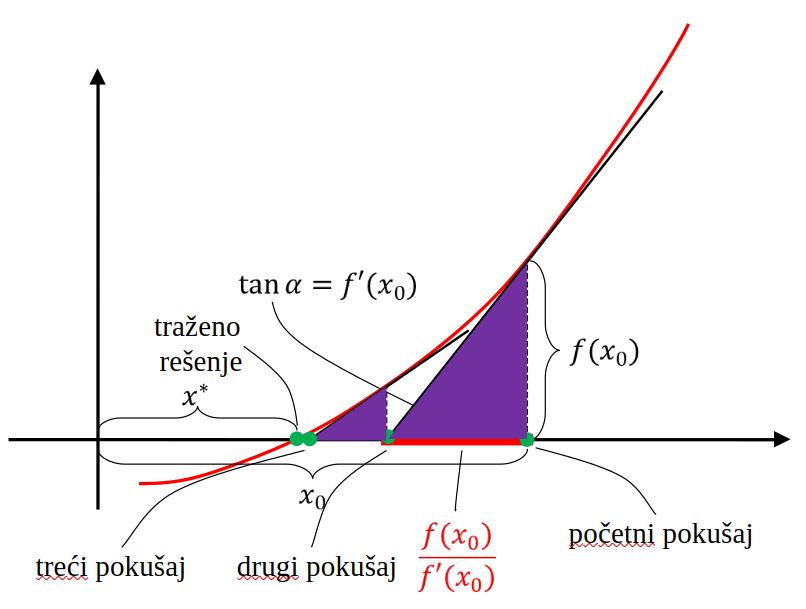

Рјешење је одређено довољно прецизно за $|x_n-x_{n-1}|<\varepsilon$, или друкчије записано као $\big|\frac{f(x_{n-1})}{f'(x_{n-1})}\big|<\varepsilon$.

Довољни услови за конвергенцију су:

а) $f(a)\cdot f(b)<0$;

б) $f'(x)\neq0$;

ц) $f''(x)$ не мијења знак на $(a,b)$.

Вријеме израчунавања: 0.0083 s
Број итерација: 4
Рјешење једначине: 4.740672


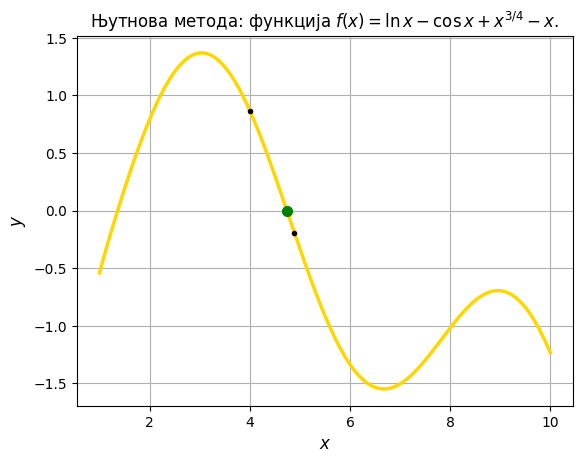

In [7]:
# Опет радимо са истом функцијом, али сада користимо Њутнову методу и дефинишемо први извод

def func(x1):
    return np.log(x1) - np.cos(x1) + x1 ** (3/4) - x1

def funcprim(x1):
    return 1/x1 + np.sin(x1) + 3/4 * x1 ** (-1/4) - 1


x = np.linspace(1, 10, 1000)
f = np.log(x) - np.cos(x) + x ** (3/4) - x

plt.plot(x, f, color='gold', linewidth=2.5)
plt.title(r'Њутнова метода: функција $f(x)=\ln{x}-\cos{x}+x^{3/4}-x$.')
plt.xlabel(r'$x$', fontsize=12, fontweight='bold')
plt.ylabel(r'$y$', fontsize=12, fontweight='bold')
plt.grid()

x1 = 4
tacnost = 1e-8
epsilon = 2 * tacnost
broj_iteracija = 0
pocetak = time.time()

while abs(epsilon) > tacnost:
    
    broj_iteracija += 1
    f = func(x1)
    fprim = funcprim(x1)
    epsilon = f/fprim
    plt.plot(x1, f, 'o', color='black', markersize=3)
    x1 = x1 - epsilon
    
vrijeme_njutn = time.time() - pocetak
iteracije_njutn = broj_iteracija 

print('Вријеме израчунавања:', np.round((vrijeme_njutn), 5), 's')
print('Број итерација: {}'.format(iteracije_njutn))
print('Рјешење једначине:', np.round((x1), 6))

plt.plot(x1, f, 'o', color='green', markersize=7)
plt.show()

#### $\color{magenta}{\text{УПОРЕЂИВАЊЕ: Тетиве vs Њутн.}} $

In [8]:
print('Однос времена израчунавања:', vrijeme_tetive/vrijeme_njutn)
print('Број итерација за методу тетива:', iteracije_tetive)
print('Број итерација за Њутнову методу:', iteracije_njutn)

Однос времена израчунавања: 1.942482196186538
Број итерација за методу тетива: 5
Број итерација за Њутнову методу: 4


#### $\color{magenta}{\text{ПРИМЈЕНА НА ФИЗИКУ: Планков закон.}} $

Планков закон представља опис расподјеле електромагнетног зрачења које емитује црно тијело, у зависности од таласне дужине 

и температуре, а дат је у облику $I(\lambda, T) = \frac{2hc²}{\lambda⁵}\frac{1}{e^{\frac{hc}{\lambda kT}}-1}$.

Наш задатак је да одредимо таласну дужину на којој Сунце зрачи $10\frac{kW}{m²nm}$.

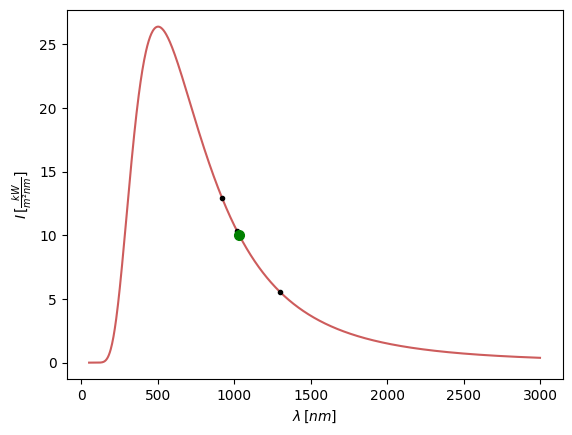

Тражена таласна дужина је: 1032.37825038803 nm
Број итерација је: 5


In [9]:
# Константе које фигуришу у једначини

c = 299792458.  # брзина свјетлости [m/s]
h = 6.62607004e-34  # Планкова константа [Js]
e = np.exp(1) 
k = 1.38064852e-23  # Болцманова константа [J/K]
t = 5778.0  # температура површине Сунца [K]


l = sym.Symbol('l') # таланса дужина (симболичка промјенљива)
f = 2 * h * c ** 2/l ** 5/(sym.exp(h * c/(l * k * t)) - 1) # закон
f1 = sym.diff(f, l) # извод по симболичкој промјенљивој

l_num = np.linspace(50e-9, 3000e-9, 1000) # нумеричке вриједности [m]
f_num = np.zeros_like(l_num)

for p in range(0, len(l_num)):
    f_num[p] = f.subs(l, l_num[p])  # симболички израз → нумерички израз
plt.plot(1e9 * l_num, f_num * 1e-12, color='indianred')  # конверзија јединица у nm и kW/m²/nm
plt.ylabel(r'$I\,[\frac{kW}{m²nm}]$')
plt.xlabel(r'$\lambda\,[nm]$')

###########################################################################################################

# Њутнова метода за проналажење таласне дужине на којој Сунце зрачи 10 kW/m²/nm

tacnost = 1e-12 
epsilon = 2 * tacnost
l_trazeno = 1300e-9  # иницијална таласна дужина [m]
f_trazeno = 10e12  # тражена вриједност у W/m²/m (основне јединице)

broj_iteracija = 0
while np.abs(epsilon) > tacnost:
    broj_iteracija += 1
    
    ff = f.subs(l, l_trazeno) - f_trazeno
    fprim = f1.subs(l, l_trazeno)
    epsilon = ff / fprim
    
    # приказ сваке итерације
    
    plt.plot(1e9 * l_trazeno, (ff + f_trazeno) * 1e-12, 'o', color='black', markersize=3) 
    l_trazeno = l_trazeno - epsilon  # ажурирање промјенљиве

plt.plot(1e9 * l_trazeno, (ff + f_trazeno) * 1e-12, 'o', color='green', markersize=7)
plt.show()

print('Тражена таласна дужина је:', l_trazeno * 1e9, 'nm')
print('Број итерација је:', broj_iteracija)

#### $\color{magenta}{\text{ПРИМЈЕНА НА ФИЗИКУ: Максвелова расподјела по брзинама.}} $

Максвелова расподјела дата је преко: $p(v)=4\pi v²\big(\frac{m}{2\pi k T}\big)^{3/2}e^{\frac{-mv²}{2kT}}$. 

Наш задатак: молекули кисеоника се крећу на апсолутној температури од $250\,K$. Треба наћи која брзина молекула има вјероватноћу од $0.0015$.

Тражена брзина је: 538.555343652303 m/s
Број итерација је: 3


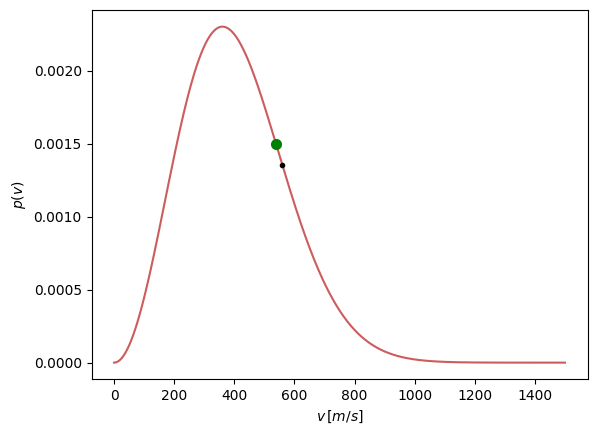

In [10]:
# константе које фигуришу у једначини

c = 299792458. # већ дефинисане величине
h = 6.62607004e-34
e = np.exp(1)

t = 250. # апсолутна температура [K]
m = 5.31e-26 # маса молекула кисеоника [kg]

v_trazeno = 560 # иницијални покушај
p_trazeno = 0.0015 # тражена вриједност у основним јединицама

v = sym.Symbol('v') # брзина (симболичка промјенљива)
p = 4 * np.pi * v ** 2 * (m /2/np.pi/k/t) ** (3/2) * sym.exp(-m * v ** 2/2/k/t) # закон
p1 = sym.diff(p,v) # извод по симболичкој промјенљивој

v_num = np.linspace(0, 1500, 1000) # нумеричке вриједности
p_num = np.zeros_like(v_num)

for k in range(0,len(v_num)):

    p_num[k] = p.subs(v,v_num[k]) # симболички израз → нумерички израз
    
plt.plot(v_num,p_num, color = 'indianred') 
plt.xlabel(r'$v\,[m/s]$')
plt.ylabel(r'$p(v)$')

###########################################################################################################

# Њутнова метода за проналажење брзине молекула кисеоника која има вјероватноћу од 0.0015

tacnost = 1e-4
delta = 2 * tacnost
broj_iteracija = 0

while np.abs(delta) > tacnost:
    broj_iteracija += 1

    pp = p.subs(v,v_trazeno)-p_trazeno
    pprim = p1.subs(v,v_trazeno)
    delta = pp / pprim
    plt.plot(v_trazeno,(pp + p_trazeno), 'o', color='black', markersize=3)
    v_trazeno = v_trazeno - delta
    
plt.plot(v_trazeno,(pp + p_trazeno), 'o', color='green', markersize=7)

print('Тражена брзина је:', v_trazeno, 'm/s')
print('Број итерација је:', broj_iteracija)

### $\color{green}{\text{Задаци:}} $

<hr style="border: none; height: 2px; background-color: green; opacity: 0.5;" />

1. Написати функцију која враћа првих $n$ чланова Фибоначијевог низа. Помоћ: $f_0=0$, $f_1=1$, $f_n=f_{n-1}+f_{n-2}$, $n\geq2$.

<hr style="border: none; height: 2px; background-color: green; opacity: 0.5;" />

2. Израчунати полупречник Шварцшилдове црне рупе $R_S$, познат и као Шварцшилдов радијус, за звиједу са масом $M=3.6\cdot10^{31}\,kg$.  

    Користити Њутнову методу за налажење рјешења једначине $f(R_S)=\frac{2GM}{R_S}-c²=0$, гдје су
    
    $G=6.67430\cdot10^{-11} \,m^3 kg^{−1} s^{−2}$ - гравитациона константа, $c=3\cdot1  0⁸ m/s$ - брзина свјетлости.


<hr style="border: none; height: 2px; background-color: green; opacity: 0.5;" />